In [1]:
import pandas as pd # import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv(r"C:\Users\sarav\Downloads\TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [3]:
df=data.reset_index()['Close'] #create a dataframe with close column
df

0        44.722000
1        44.647999
2        44.702000
3        45.000000
4        44.585999
           ...    
1253    713.760010
1254    709.989990
1255    707.820007
1256    722.250000
1257    717.169983
Name: Close, Length: 1258, dtype: float64

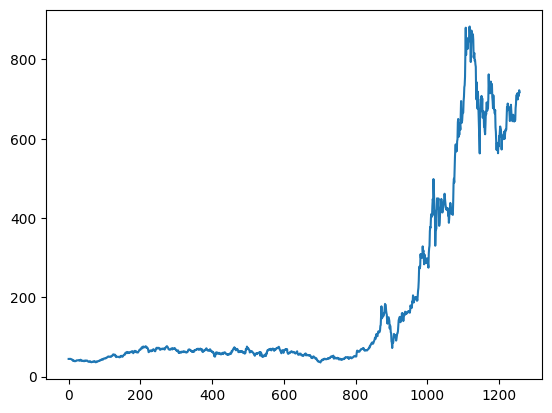

In [4]:
plt.plot(df)
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [6]:
df.shape

(1258, 1)

In [70]:
train_set=int(len(df)*0.6) #take 60% of data for training
test_set=len(df)-train_set 
train_data,test_data=df[0:train_set,:],df[train_set:len(df),:]

In [71]:
train_set,test_set

(754, 504)

In [76]:
train_data

array([[0.01053705],
       [0.01044971],
       [0.01051345],
       [0.01086515],
       [0.01037654],
       [0.01082738],
       [0.01030336],
       [0.00991153],
       [0.00968257],
       [0.00855191],
       [0.00764078],
       [0.00779893],
       [0.00514578],
       [0.00444001],
       [0.00563204],
       [0.00536766],
       [0.00434087],
       [0.0036587 ],
       [0.00456275],
       [0.00403165],
       [0.00411663],
       [0.00506317],
       [0.00623867],
       [0.00646056],
       [0.00605928],
       [0.00619618],
       [0.0064818 ],
       [0.00672257],
       [0.00708607],
       [0.00633545],
       [0.00644403],
       [0.00512926],
       [0.00591529],
       [0.00819785],
       [0.0076573 ],
       [0.00696097],
       [0.00520007],
       [0.00416383],
       [0.00518827],
       [0.00498763],
       [0.00532045],
       [0.00502068],
       [0.00414023],
       [0.00353832],
       [0.00475159],
       [0.00580435],
       [0.00475159],
       [0.004

In [77]:
def meth(data,timeset=1):
    X,y=[],[]
    for i in range(len(data)-timeset-1): 
        a=data[i:(i+timeset),0]
        X.append(a)
        y.append(data[(i+timeset)])
    return np.array(X),np.array(y)

In [82]:
timeset=75
X_train,y_train=meth(train_data,timeset)
X_test,y_test=meth(test_data,timeset)

In [83]:
y_train

array([[0.00068689],
       [0.00059011],
       [0.00184823],
       [0.00162399],
       [0.00334712],
       [0.00314412],
       [0.00311816],
       [0.00317717],
       [0.00452735],
       [0.00465481],
       [0.0043928 ],
       [0.00555178],
       [0.00560843],
       [0.00703886],
       [0.00678158],
       [0.00695861],
       [0.00811287],
       [0.00957398],
       [0.00962356],
       [0.00842917],
       [0.00819548],
       [0.00897443],
       [0.01133488],
       [0.01127823],
       [0.01181169],
       [0.01234752],
       [0.01201469],
       [0.01198164],
       [0.0119486 ],
       [0.01387473],
       [0.01336251],
       [0.01401872],
       [0.01529336],
       [0.01552232],
       [0.01651135],
       [0.01785445],
       [0.0178214 ],
       [0.01735875],
       [0.01746261],
       [0.01691499],
       [0.01722185],
       [0.01658688],
       [0.01713215],
       [0.01708022],
       [0.01860035],
       [0.01853189],
       [0.0196177 ],
       [0.021

In [84]:
X_test.shape

(428, 75)

In [85]:
X_train.shape

(678, 75)

In [86]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
import tensorflow

In [87]:
tensorflow.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(timeset,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 75, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 10s 306ms/step - loss: 2.6099e-04 - val_loss: 0.1981
Epoch 2/100
11/11 [==============================] - 2s 172ms/step - loss: 1.0853e-04 - val_loss: 0.1813
Epoch 3/100
11/11 [==============================] - 2s 172ms/step - loss: 8.3748e-05 - val_loss: 0.1300
Epoch 4/100
11/11 [==============================] - 2s 192ms/step - loss: 5.9430e-05 - val_loss: 0.0593
Epoch 5/100
11/11 [==============================] - 2s 184ms/step - loss: 3.9906e-05 - val_loss: 0.0173
Epoch 6/100
11/11 [==============================] - 2s 180ms/step - loss: 3.9590e-05 - val_loss: 0.0317
Epoch 7/100
11/11 [==============================] - 2s 176ms/step - loss: 4.8171e-05 - val_loss: 0.0416
Epoch 8/100
11/11 [==============================] - 2s 175ms/step - loss: 3.4828e-05 - val_loss: 0.0263
Epoch 9/100
11/11 [==============================] - 2s 178ms/step - loss: 3.4050e-05 - val_loss: 0.0191
Epoch 10/100
11/11 [==============================] - 

In [90]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

14/14 [==============================] - 1s 39ms/step


In [91]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [92]:
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

In [21]:
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error

In [95]:
print("Train data R2 score:", r2_score(y_train, train_pred))
print("Test data R2 score:", r2_score(y_test, test_pred))

Train data R2 score: 0.9292545068914083
Test data R2 score: 0.9409022850617084


In [96]:
len(df),len(train_pred)

(1258, 678)

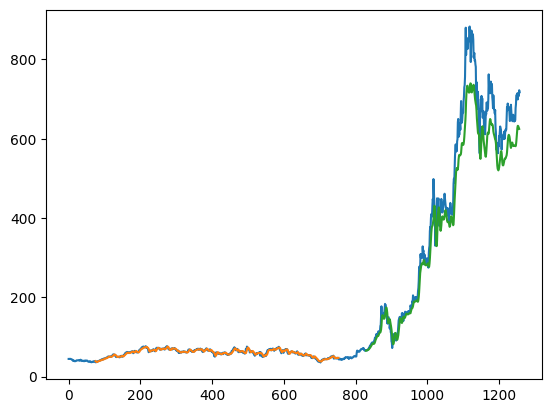

In [97]:
settin=75
tr_pred_plot=np.empty_like(df)## to create a new array with the same shape and type as a given array
tr_pred_plot[:,:]=np.nan## fill all with nan values
tr_pred_plot[settin:len(train_pred)+settin,:]=train_pred

tt_pred_plot=np.empty_like(df)
tt_pred_plot[:,:]=np.nan
tt_pred_plot[len(train_pred)+(settin*2)+1:len(df)-1,:]=test_pred

plt.plot(scaler.inverse_transform(df))
plt.plot(tr_pred_plot)
plt.plot(tt_pred_plot)
plt.show()

In [98]:
print("Train data MAPE: ", mean_absolute_percentage_error(y_train,train_pred))
print("-------------------------------------------------------------------------------------")
print("Test data MAPE: ", mean_absolute_percentage_error(y_test,test_pred))

Train data MAPE:  0.03132410541759554
-------------------------------------------------------------------------------------
Test data MAPE:  0.0944599401436278


In [99]:
x_input=test_data[len(test_data)-timeset:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=timeset
i=0
days = 30
while(i<days):
    
    if(len(temp_input)>timeset):
        
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
               
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [100]:
new=np.arange(1,timeset+1)
pred=np.arange(timeset+1,timeset+days+1)

In [101]:
df1=df.tolist()
df1.extend(lst_output)

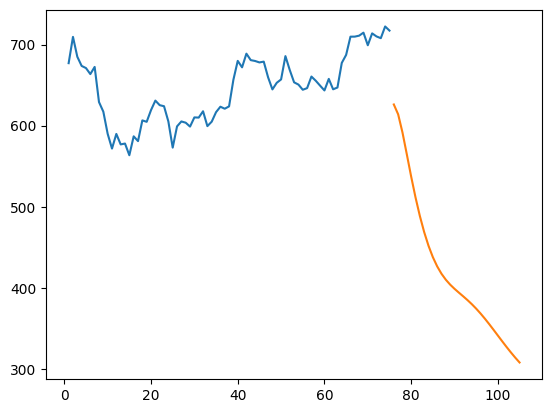

In [102]:
plt.plot(new,scaler.inverse_transform(df[1183:]))
plt.plot(pred,scaler.inverse_transform(lst_output))

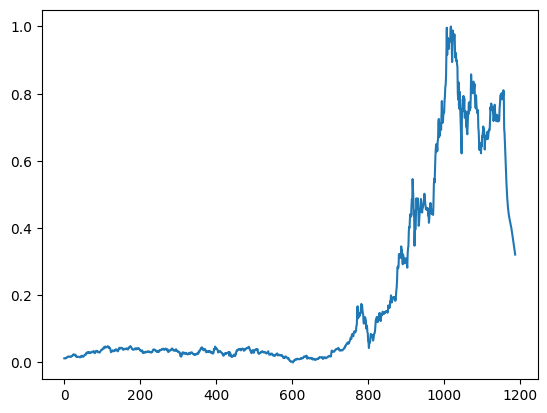

In [103]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[100:])

Gated Recurrent Units (GRU)

In [104]:
from tensorflow.keras.layers import GRU

In [105]:
timeset1=50
X_train,y_train=meth(train_data,timeset1)
X_test,y_test=meth(test_data,timeset1)

In [106]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [107]:
tensorflow.keras.backend.clear_session()
model1=Sequential()
model1.add(GRU(30,return_sequences=True,input_shape=(timeset1,1)))
model1.add(GRU(30,return_sequences=True))
model1.add(GRU(30))
model1.add(Dropout(0.20))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [108]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
22/22 [==============================] - 15s 191ms/step - loss: 1.8410e-04 - val_loss: 0.1454
Epoch 2/100
22/22 [==============================] - 2s 86ms/step - loss: 7.3395e-05 - val_loss: 0.0517
Epoch 3/100
22/22 [==============================] - 2s 85ms/step - loss: 3.2690e-05 - val_loss: 0.0031
Epoch 4/100
22/22 [==============================] - 2s 90ms/step - loss: 2.8157e-05 - val_loss: 0.0087
Epoch 5/100
22/22 [==============================] - 2s 77ms/step - loss: 2.6119e-05 - val_loss: 0.0054
Epoch 6/100
22/22 [==============================] - 2s 81ms/step - loss: 2.4810e-05 - val_loss: 0.0043
Epoch 7/100
22/22 [==============================] - 2s 77ms/step - loss: 2.0365e-05 - val_loss: 0.0050
Epoch 8/100
22/22 [==============================] - 2s 77ms/step - loss: 2.0192e-05 - val_loss: 0.0052
Epoch 9/100
22/22 [==============================] - 2s 94ms/step - loss: 1.7758e-05 - val_loss: 0.0045
Epoch 10/100
22/22 [==============================] - 2s 103ms

In [109]:
train_pred1=model1.predict(X_train)
test_pred1=model1.predict(X_test)

15/15 [==============================] - 0s 20ms/step


In [110]:
train_pred1=scaler.inverse_transform(train_pred1)
test_pred1=scaler.inverse_transform(test_pred1)
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

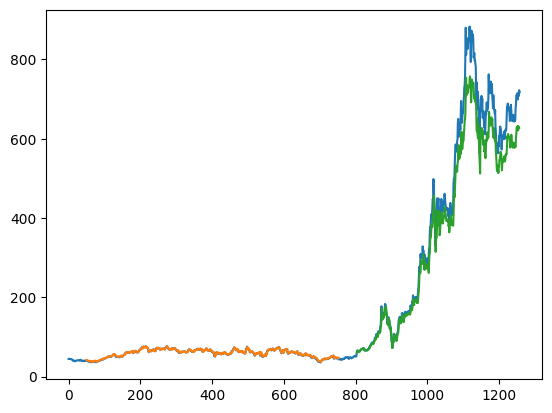

In [111]:
settin=50
tr_pred_plot=np.empty_like(df)## to create a new array with the same shape and type as a given array
tr_pred_plot[:,:]=np.nan## fill all with nan values
tr_pred_plot[settin:len(train_pred1)+settin,:]=train_pred1

tt_pred_plot=np.empty_like(df)
tt_pred_plot[:,:]=np.nan
tt_pred_plot[len(train_pred1)+(settin*2)+1:len(df)-1,:]=test_pred1

plt.plot(scaler.inverse_transform(df))
plt.plot(tr_pred_plot)
plt.plot(tt_pred_plot)
plt.show()

In [112]:
print("Train data MAPE: ", mean_absolute_percentage_error(y_train,train_pred1))
print("-------------------------------------------------------------------------------------")
print("Test data MAPE: ", mean_absolute_percentage_error(y_test,test_pred1))

Train data MAPE:  0.023300559147280363
-------------------------------------------------------------------------------------
Test data MAPE:  0.07731503516373399


In [113]:
x_input1=test_data[len(test_data)-timeset1:].reshape(1,-1)
temp_input1=list(x_input1)
temp_input1=temp_input1[0].tolist()

from numpy import array

lst_output1=[]
n_steps=timeset1
i=0
days = 30
while(i<days):
    
    if(len(temp_input1)>timeset1):
        
        x_input1=np.array(temp_input1[1:])
        x_input1 = x_input1.reshape(1,-1)
        x_input1 = x_input1.reshape((1, n_steps, 1))
        
        yhat = model1.predict(x_input1, verbose=0)
        temp_input1.extend(yhat[0].tolist())
        temp_input1=temp_input1[1:]
               
        lst_output1.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input1 = x_input1.reshape((1, n_steps,1))
        yhat = model1.predict(x_input1, verbose=0)
        temp_input1.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output1))

Output of predicted next days:  30


In [114]:
new1=np.arange(1,timeset1+1)
pred1=np.arange(timeset1+1,timeset1+days+1)

In [115]:
df2=df.tolist()
df2.extend(lst_output1)

In [116]:
df.shape

(1258, 1)

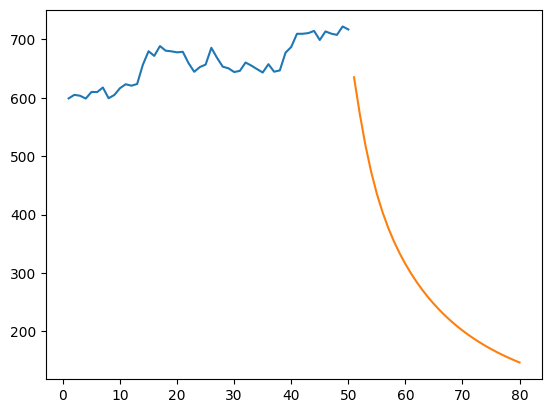

In [117]:
plt.plot(new1,scaler.inverse_transform(df[1208:]))
plt.plot(pred1,scaler.inverse_transform(lst_output1))

In [118]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [119]:
dta=data[['Date','Close']]

In [120]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Close   1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [121]:
dta.head()

,Date,Close
0,2016-08-16,44.722000
1,2016-08-17,44.647999
2,2016-08-18,44.702000
3,2016-08-19,45.000000
4,2016-08-22,44.585999


<AxesSubplot: >

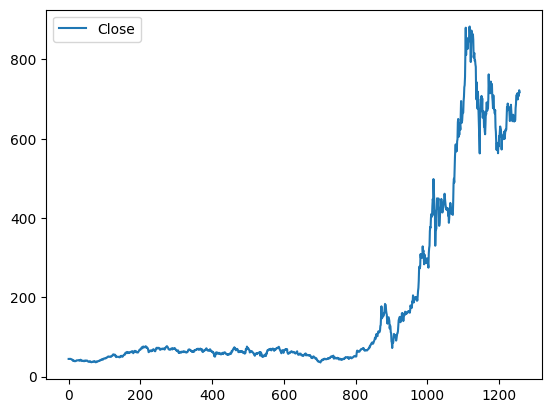

In [122]:
dta.plot()

C:\Users\sarav\AppData\Local\Temp\ipykernel_11712\3214491947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Close']=np.log(dta['Close'])


<AxesSubplot: >

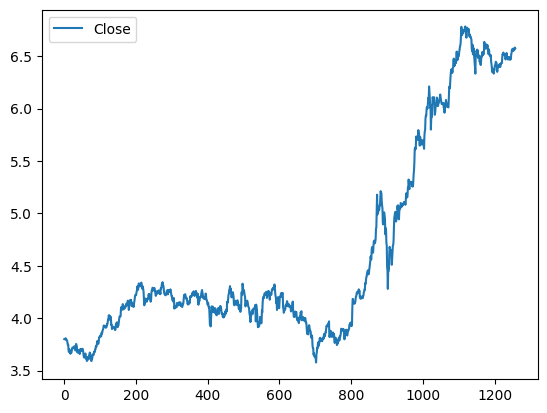

In [123]:
dta['Close']=np.log(dta['Close'])
dta.plot()

In [124]:
filtr = (dta.index < len(dta)-500)
df_train = dta[filtr].copy()
df_test = dta[~filtr].copy()

In [125]:
df_train.shape,df_test.shape

((758, 2), (500, 2))

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


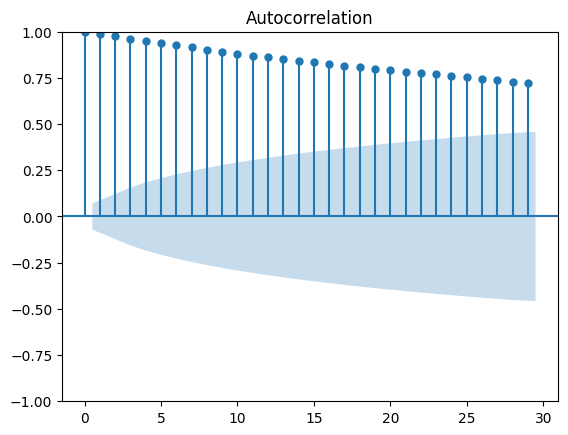

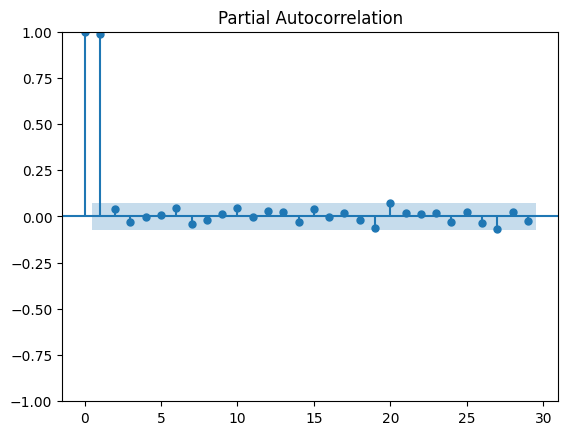

In [56]:
acf_original = plot_acf(df_train['Close'])
pacf_original = plot_pacf(df_train['Close'])

In [57]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train['Close'])
print(f'p value: {adf_test[1]}')

p value: 0.2513566977488637


Since the p value is greater than 0.05, it fails to reject the null hypothesis,thus it is not stationary

<AxesSubplot: >

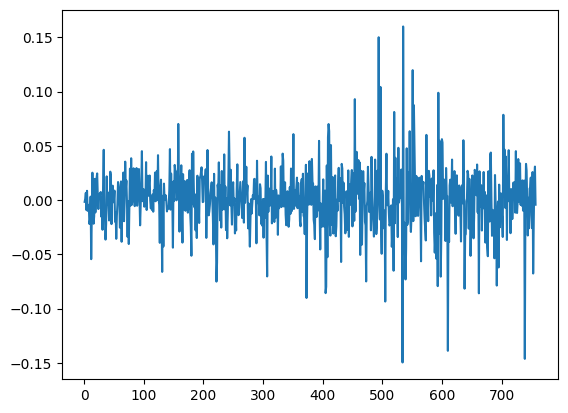

In [58]:
### to make the time series stationary we do differencing
diff_train = df_train['Close'].diff().dropna()
diff_train.plot()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


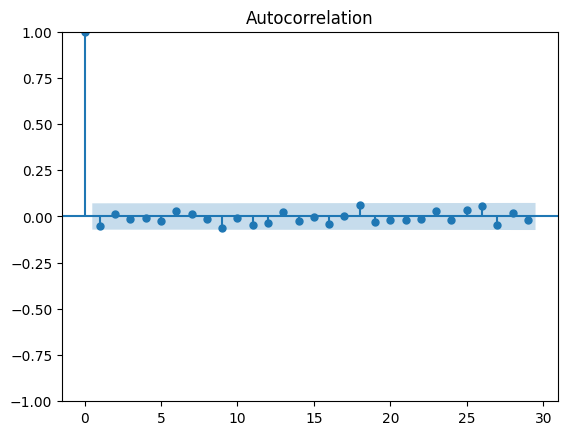

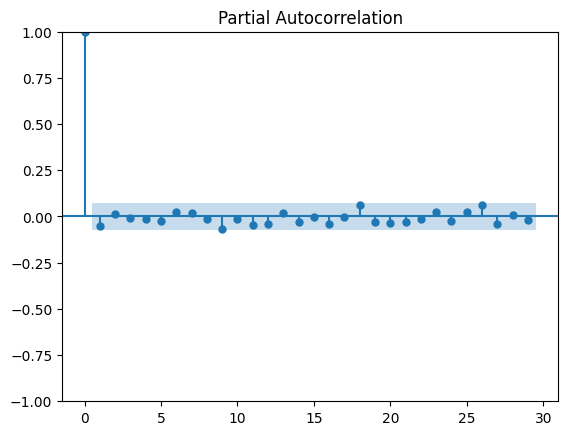

In [59]:
acf_diff = plot_acf(diff_train)
pacf_diff = plot_pacf(diff_train)

In [60]:
adf_test = adfuller(diff_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


We can reject the null hypothesis so the time series is Stationary.

In [61]:
from statsmodels.tsa.arima.model import ARIMA
model0 = ARIMA(diff_train, order=(0,0,0))
model_fit = model0.fit()
print(model_fit.summary())

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  757
Model:                          ARIMA   Log Likelihood                1596.203
Date:                Sun, 14 May 2023   AIC                          -3188.405
Time:                        17:04:06   BIC                          -3179.146
Sample:                             0   HQIC                         -3184.839
                                - 757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.223e-06      0.001      0.008      0.994      -0.002       0.002
sigma2         0.0009   2.42e-05     35.660      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.90   Jarque-

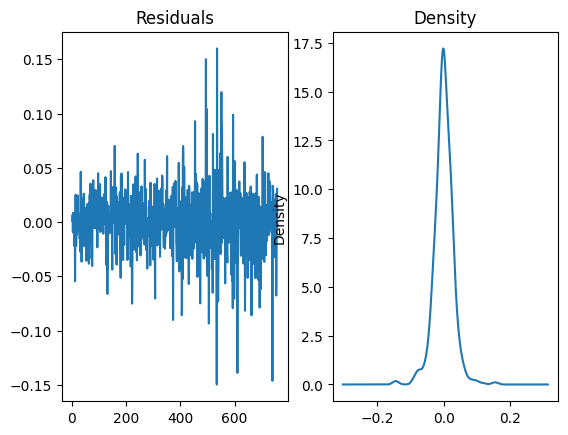

In [62]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


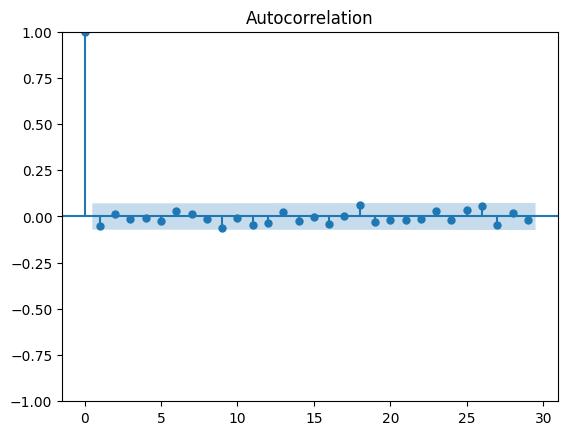

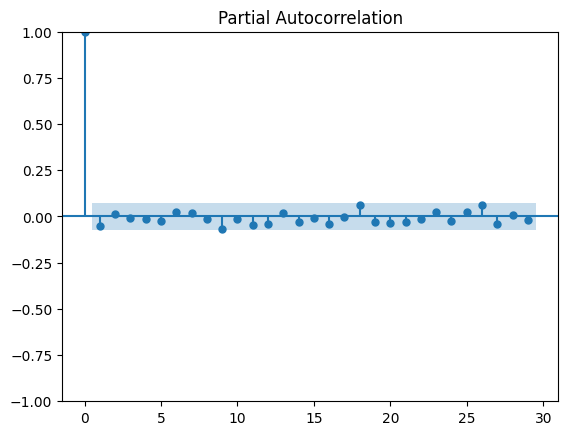

In [63]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [64]:
dta.info

<bound method DataFrame.info of             Date     Close
0     2016-08-16  3.800466
1     2016-08-17  3.798809
2     2016-08-18  3.800018
3     2016-08-19  3.806662
4     2016-08-22  3.797420
...          ...       ...
1253  2021-08-09  6.570547
1254  2021-08-10  6.565251
1255  2021-08-11  6.562190
1256  2021-08-12  6.582371
1257  2021-08-13  6.575313

[1258 rows x 2 columns]>

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sarav\AppData\Local\Temp\ipykernel_11712\3991829941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


<AxesSubplot: >

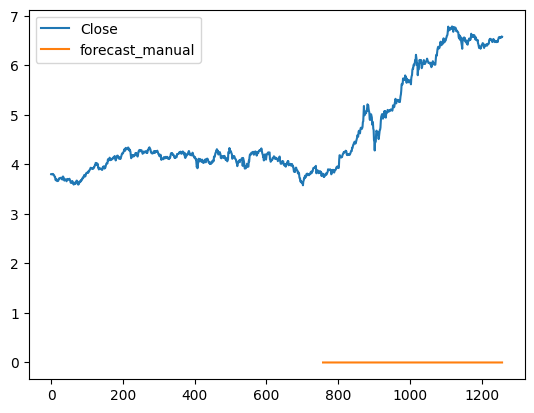

In [65]:
forecast_test = model_fit.forecast(len(df_test['Close']))
dta['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
dta.plot()

In [66]:
df_test

,Date,Close
758,2019-08-21,3.787955
759,2019-08-22,3.793915
760,2019-08-23,3.744314
761,2019-08-26,3.761200
762,2019-08-27,3.756912
...,...,...
1253,2021-08-09,6.570547
1254,2021-08-10,6.565251
1255,2021-08-11,6.562190
1256,2021-08-12,6.582371


In [67]:
dta

,Date,Close,forecast_manual
0,2016-08-16,3.800466,NaN
1,2016-08-17,3.798809,NaN
2,2016-08-18,3.800018,NaN
3,2016-08-19,3.806662,NaN
4,2016-08-22,3.797420,NaN
...,...,...,...
1253,2021-08-09,6.570547,0.000008
1254,2021-08-10,6.565251,0.000008
1255,2021-08-11,6.562190,0.000008
1256,2021-08-12,6.582371,0.000008
